In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tqdm
import numpy
import torchvision
import torchvision.transforms.v2

train = torchvision.datasets.CIFAR10('cifar-10', train = True, download = False)
test = torchvision.datasets.CIFAR10('cifar-10', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) for item in tqdm.tqdm(train) ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) for item in tqdm.tqdm(test) ])
test_labels = numpy.array([ item[1] for item in test ])

train_images.shape, test_images.shape

100%|██████████| 10000/10000 [00:00<00:00, 37433.10it/s]


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
import skimage.color

train_images = numpy.array([ skimage.color.rgb2gray(item) for item in tqdm.tqdm(train_images) ])
test_images = numpy.array([ skimage.color.rgb2gray(item) for item in tqdm.tqdm(test_images) ])

100%|██████████| 10000/10000 [00:00<00:00, 31873.19it/s]


In [4]:
import gtda.diagrams
import gtda.homology
import cvtda.topology

def make_features(train, test):
    filtrations_to_diagrams = cvtda.topology.FiltrationsToDiagrams(homology_dimensions = [ 0, 1 ], verbose = True)
    train = filtrations_to_diagrams.fit_transform(train)
    test = filtrations_to_diagrams.transform(test)
    print(train.shape, test.shape)

    scaler = gtda.diagrams.Scaler()
    train = scaler.fit_transform(train)
    test = scaler.transform(test)

    if len(train[0]) < 96:
        n_bins = 32
    elif len(train[0]) < 192:
        n_bins = 64
    else:
        n_bins = 128

    print(f"Bins: {n_bins}")
    digrams_to_features = cvtda.topology.DiagramsToFeatures(batch_size = 625, n_bins = n_bins, verbose = True)
    train = digrams_to_features.fit_transform(train)
    test = digrams_to_features.transform(test)
    print(train.shape, test.shape)
    return train, test

In [5]:
import cv2
import itertools

def binarize(image: numpy.ndarray) -> numpy.ndarray:
    image = numpy.array(image * 255, dtype = numpy.uint8)
    image = cv2.medianBlur(image, 5)
    return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 0)

In [6]:
def process(train: numpy.ndarray, test: numpy.ndarray):
    train_features = [ ]
    test_features = [ ]
    tr, te = make_features(train, test)
    train_features.append(tr)
    test_features.append(te)

    train = numpy.array([ binarize(item) for item in tqdm.tqdm(train) ])
    test = numpy.array([ binarize(item) for item in tqdm.tqdm(test) ])

    centers = [ 3, 8, 13, 18, 23, 28 ]
    greyscale_to_filtrations = cvtda.topology.GreyscaleToFiltrations(
        binarizer_threshold = 0.4,
        radial_filtration_centers = list(itertools.product(centers, centers))
    )
    for i, filtration in enumerate(greyscale_to_filtrations.filtrations_):
        print(f"{i}/{len(greyscale_to_filtrations.filtrations_)}). {filtration}")
        tr, te = make_features(train, test)
        train_features.append(tr)
        test_features.append(te)
    return numpy.hstack(train_features), numpy.hstack(test_features)

In [7]:
train_features, test_features = process(train_images, test_images)
numpy.save(f"12/train.npy", train_features)
numpy.save(f"12/test.npy", test_features)

Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5339.40it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7774.50it/s]


(50000, 247, 3) (10000, 222, 3)
Bins: 128
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Fitting complete


Batch:   0%|          | 0/80 [00:00<?, ?it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Batch: 100%|██████████| 16/16 [00:21<00:00,  1.33s/it]


(50000, 70) (10000, 70)


100%|██████████| 10000/10000 [00:00<00:00, 11971.32it/s]


0/36). RadialFiltration(center=array([3, 3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:11<00:00, 4389.04it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5012.53it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 33.76it/s]


(50000, 70) (10000, 70)
1/36). RadialFiltration(center=array([3, 8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:12<00:00, 3995.53it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5186.72it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 35.87it/s]


(50000, 70) (10000, 70)
2/36). RadialFiltration(center=array([ 3, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:11<00:00, 4191.46it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5272.46it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 34.89it/s]


(50000, 70) (10000, 70)
3/36). RadialFiltration(center=array([ 3, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:11<00:00, 4486.43it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5428.95it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 34.33it/s]


(50000, 70) (10000, 70)
4/36). RadialFiltration(center=array([ 3, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:11<00:00, 4393.95it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5562.06it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 36.30it/s]


(50000, 70) (10000, 70)
5/36). RadialFiltration(center=array([ 3, 28]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:11<00:00, 4449.67it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5314.48it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  5.89it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 36.04it/s]


(50000, 70) (10000, 70)
6/36). RadialFiltration(center=array([8, 3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:11<00:00, 4527.78it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5537.10it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 36.78it/s]


(50000, 70) (10000, 70)
7/36). RadialFiltration(center=array([8, 8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:11<00:00, 4535.15it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5611.68it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 34.33it/s]


(50000, 70) (10000, 70)
8/36). RadialFiltration(center=array([ 8, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4568.71it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5571.16it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 35.87it/s]


(50000, 70) (10000, 70)
9/36). RadialFiltration(center=array([ 8, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:11<00:00, 4542.98it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5571.05it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 35.32it/s]


(50000, 70) (10000, 70)
10/36). RadialFiltration(center=array([ 8, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4572.06it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5770.35it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 36.12it/s]


(50000, 70) (10000, 70)
11/36). RadialFiltration(center=array([ 8, 28]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4578.34it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5662.69it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 36.87it/s]


(50000, 70) (10000, 70)
12/36). RadialFiltration(center=array([13,  3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:11<00:00, 4543.80it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5580.49it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 37.12it/s]


(50000, 70) (10000, 70)
13/36). RadialFiltration(center=array([13,  8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4578.77it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5659.46it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 36.87it/s]


(50000, 70) (10000, 70)
14/36). RadialFiltration(center=array([13, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4559.96it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5691.55it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.93it/s]


(50000, 70) (10000, 70)
15/36). RadialFiltration(center=array([13, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4695.28it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5614.93it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.46it/s]


(50000, 70) (10000, 70)
16/36). RadialFiltration(center=array([13, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4652.46it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5948.84it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 32.73it/s]


(50000, 70) (10000, 70)
17/36). RadialFiltration(center=array([13, 28]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4579.19it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5699.30it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.49it/s]


(50000, 70) (10000, 70)
18/36). RadialFiltration(center=array([18,  3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4633.87it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5543.29it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 39.23it/s]


(50000, 70) (10000, 70)
19/36). RadialFiltration(center=array([18,  8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4736.64it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5906.68it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 39.03it/s]


(50000, 70) (10000, 70)
20/36). RadialFiltration(center=array([18, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4709.87it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5865.10it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.74it/s]


(50000, 70) (10000, 70)
21/36). RadialFiltration(center=array([18, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4592.63it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5717.69it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.74it/s]


(50000, 70) (10000, 70)
22/36). RadialFiltration(center=array([18, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4733.95it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5854.94it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.19it/s]


(50000, 70) (10000, 70)
23/36). RadialFiltration(center=array([18, 28]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4732.16it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5707.90it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.46it/s]


(50000, 70) (10000, 70)
24/36). RadialFiltration(center=array([23,  3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4743.38it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5760.37it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 39.90it/s]


(50000, 70) (10000, 70)
25/36). RadialFiltration(center=array([23,  8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4733.97it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5856.15it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.46it/s]


(50000, 70) (10000, 70)
26/36). RadialFiltration(center=array([23, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4697.93it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5885.96it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 39.80it/s]


(50000, 70) (10000, 70)
27/36). RadialFiltration(center=array([23, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4704.11it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5871.99it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.19it/s]


(50000, 70) (10000, 70)
28/36). RadialFiltration(center=array([23, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4754.68it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5662.51it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.84it/s]


(50000, 70) (10000, 70)
29/36). RadialFiltration(center=array([23, 28]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4732.63it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5481.09it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 36.17it/s]


(50000, 70) (10000, 70)
30/36). RadialFiltration(center=array([28,  3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4581.59it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5807.20it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.19it/s]


(50000, 70) (10000, 70)
31/36). RadialFiltration(center=array([28,  8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4607.87it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5711.02it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.84it/s]


(50000, 70) (10000, 70)
32/36). RadialFiltration(center=array([28, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4643.82it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5675.37it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 39.12it/s]


(50000, 70) (10000, 70)
33/36). RadialFiltration(center=array([28, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4633.49it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5611.68it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.55it/s]


(50000, 70) (10000, 70)
34/36). RadialFiltration(center=array([28, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4716.09it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5373.55it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 38.27it/s]


(50000, 70) (10000, 70)
35/36). RadialFiltration(center=array([28, 28]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4577.10it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5800.57it/s]


(50000, 55, 3) (10000, 50, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 35.79it/s]


(50000, 70) (10000, 70)


In [8]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3143, 'TOP-2 Accuracy': 0.495, 'TOP-3 Accuracy': 0.6185, 'TOP-4 Accuracy': 0.7087, 'TOP-5 Accuracy': 0.7865, 'TOP-6 Accuracy': 0.8507, 'TOP-7 Accuracy': 0.9029, 'TOP-8 Accuracy': 0.943, 'TOP-9 Accuracy': 0.9757, 'AUC-ROC': 0.7493932833333333, 'Precision': 0.3099433279457594, 'Recall': 0.3143, 'F1-score': 0.30561197670255247}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.3229, 'TOP-2 Accuracy': 0.5084, 'TOP-3 Accuracy': 0.6292, 'TOP-4 Accuracy': 0.7182, 'TOP-5 Accuracy': 0.7979, 'TOP-6 Accuracy': 0.8581, 'TOP-7 Accuracy': 0.9122, 'TOP-8 Accuracy': 0.9524, 'TOP-9 Accuracy': 0.9819, 'AUC-ROC': 0.7563738166666667, 'Precision': 0.31310629077926977, 'Recall': 0.32289999999999996, 'F1-score': 0.3126254292375938}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000001E2587341C0>
Input to LazyLinear: 

100%|██████████| 25/25 [00:36<00:00,  1.46s/it, loss=1.07e+5, val_acc=0.327]


{'classifier': 'NNClassifier', 'Accuracy': 0.3273, 'TOP-2 Accuracy': 0.5088, 'TOP-3 Accuracy': 0.6252, 'TOP-4 Accuracy': 0.7151, 'TOP-5 Accuracy': 0.7826, 'TOP-6 Accuracy': 0.845, 'TOP-7 Accuracy': 0.9035, 'TOP-8 Accuracy': 0.9501, 'TOP-9 Accuracy': 0.9786, 'AUC-ROC': 0.7468860111111111, 'Precision': 0.29189346368021696, 'Recall': 0.32730000000000004, 'F1-score': 0.3038766611247109}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42, verbose=2)
Binning 0.932 GB of training data: 3.737 s
Binning 0.104 GB of validation data: 0.050 s
Fitting gradient boosted rounds:
[1/20] 10 trees, 160 leaves (16 on avg), max depth = 4, train loss: 2.23072, val loss: 2.23403, in 0.914s
[2/20] 10 trees, 159 leaves (15 on avg), max depth = 4, train loss: 2.18085, val loss: 2.18771, in 0.899s
[3/20] 10 trees, 160 leaves (16 on avg), max depth = 4, train loss: 2.13886, val loss: 2.14966, in 0.935s
[4/20] 10 trees, 160 leaves (16 o

d:\Programs\Programming\Python\lib\site-packages\xgboost\core.py:158: UserWarning: [19:58:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


{'classifier': 'XGBClassifier', 'Accuracy': 0.3391, 'TOP-2 Accuracy': 0.5299, 'TOP-3 Accuracy': 0.6604, 'TOP-4 Accuracy': 0.7507, 'TOP-5 Accuracy': 0.8256, 'TOP-6 Accuracy': 0.8825, 'TOP-7 Accuracy': 0.9309, 'TOP-8 Accuracy': 0.9618, 'TOP-9 Accuracy': 0.987, 'AUC-ROC': 0.7784248555555554, 'Precision': 0.3280412049301934, 'Recall': 0.3391, 'F1-score': 0.32719573142106945}


,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3143,0.4950,0.6185,0.7087,0.7865,0.8507,0.9029,0.9430,0.9757,0.749393,0.309943,0.3143,0.305612
1,RandomForestClassifier,0.3229,0.5084,0.6292,0.7182,0.7979,0.8581,0.9122,0.9524,0.9819,0.756374,0.313106,0.3229,0.312625
2,NNClassifier,0.3273,0.5088,0.6252,0.7151,0.7826,0.8450,0.9035,0.9501,0.9786,0.746886,0.291893,0.3273,0.303877
3,HistGradientBoostingClassifier,0.3209,0.5097,0.6319,0.7290,0.8095,0.8699,0.9151,0.9565,0.9831,0.761970,0.309719,0.3209,0.306431
4,CatBoostClassifier,0.3567,0.5530,0.6809,0.7728,0.8413,0.8946,0.9366,0.9685,0.9875,0.794096,0.346668,0.3567,0.347836
5,XGBClassifier,0.3391,0.5299,0.6604,0.7507,0.8256,0.8825,0.9309,0.9618,0.9870,0.778425,0.328041,0.3391,0.327196


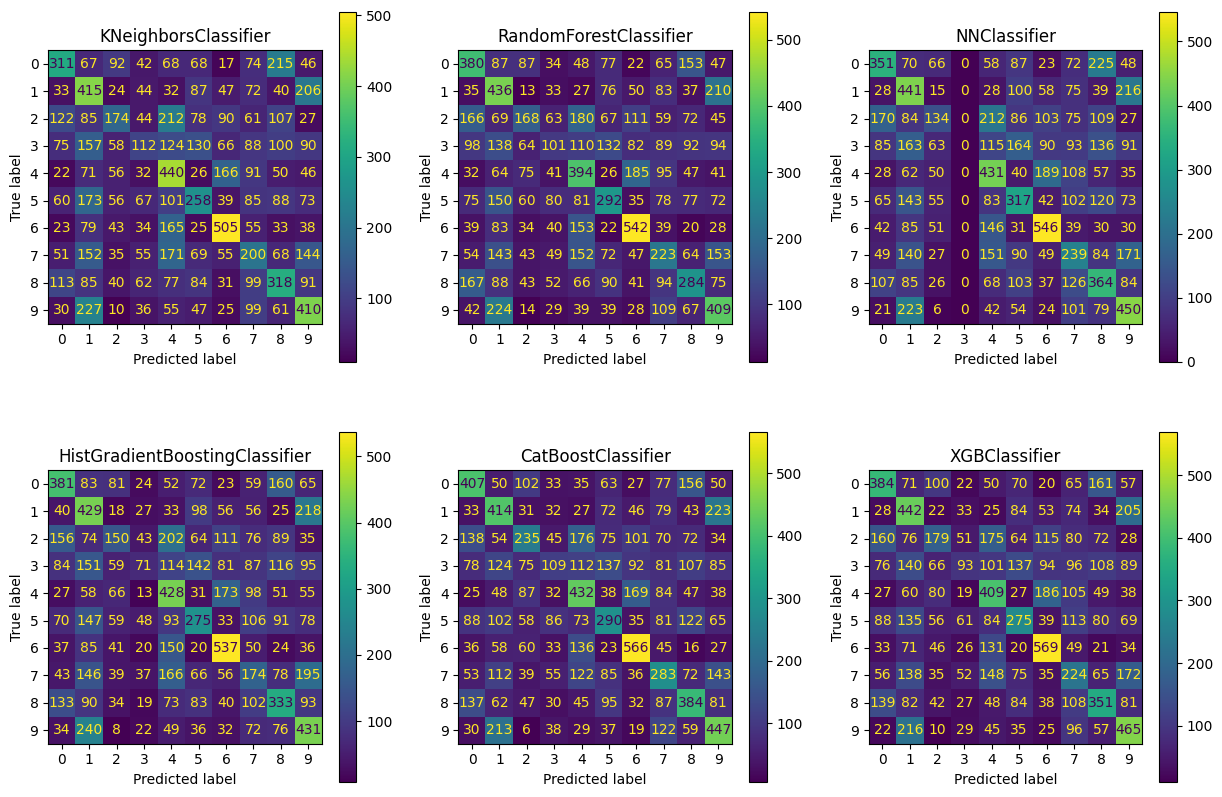

In [9]:
import cvtda.classification

cvtda.classification.classify(train_features, train_labels, test_features, test_labels)

In [10]:
import gtda.images

inverter = gtda.images.Inverter()

train_images = inverter.fit_transform(train_images)
test_images = inverter.transform(test_images)

In [11]:
inv_train_features, inv_test_features = process(train_images, test_images)
numpy.save(f"12/inv_train.npy", inv_train_features)
numpy.save(f"12/inv_test.npy", inv_test_features)

Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:07<00:00, 6787.98it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7657.12it/s]


(50000, 240, 3) (10000, 225, 3)
Bins: 128
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Fitting complete


Batch:   0%|          | 0/80 [00:21<?, ?it/s]


KeyboardInterrupt: 

In [14]:
train_features = numpy.hstack([ train_features, inv_train_features ])
test_features = numpy.hstack([ test_features, inv_test_features ])

train_features.shape, test_features.shape

((50000, 5180), (10000, 5180))

In [15]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3567, 'TOP-2 Accuracy': 0.5441, 'TOP-3 Accuracy': 0.6622, 'TOP-4 Accuracy': 0.748, 'TOP-5 Accuracy': 0.8146, 'TOP-6 Accuracy': 0.8744, 'TOP-7 Accuracy': 0.919, 'TOP-8 Accuracy': 0.953, 'TOP-9 Accuracy': 0.9802, 'AUC-ROC': 0.7816018944444443, 'Precision': 0.35804485583268636, 'Recall': 0.3567, 'F1-score': 0.3491407607928316}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.3672, 'TOP-2 Accuracy': 0.5519, 'TOP-3 Accuracy': 0.6648, 'TOP-4 Accuracy': 0.7538, 'TOP-5 Accuracy': 0.821, 'TOP-6 Accuracy': 0.8755, 'TOP-7 Accuracy': 0.9186, 'TOP-8 Accuracy': 0.9571, 'TOP-9 Accuracy': 0.9824, 'AUC-ROC': 0.7838274055555555, 'Precision': 0.36102303211583114, 'Recall': 0.3672, 'F1-score': 0.3585044052969037}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000002595E942830>
Input to LazyLinear: 5180
Parameters

100%|██████████| 25/25 [00:40<00:00,  1.63s/it, loss=1.05e+5, val_acc=0.383]


{'classifier': 'NNClassifier', 'Accuracy': 0.3828, 'TOP-2 Accuracy': 0.5725, 'TOP-3 Accuracy': 0.6806, 'TOP-4 Accuracy': 0.7613, 'TOP-5 Accuracy': 0.8285, 'TOP-6 Accuracy': 0.8767, 'TOP-7 Accuracy': 0.9204, 'TOP-8 Accuracy': 0.955, 'TOP-9 Accuracy': 0.982, 'AUC-ROC': 0.783686788888889, 'Precision': 0.3772714162996133, 'Recall': 0.3828, 'F1-score': 0.3726923022939492}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42, verbose=2)
Binning 1.865 GB of training data: 7.756 s
Binning 0.207 GB of validation data: 0.129 s
Fitting gradient boosted rounds:
[1/20] 10 trees, 160 leaves (16 on avg), max depth = 4, train loss: 2.22163, val loss: 2.22737, in 1.596s
[2/20] 10 trees, 160 leaves (16 on avg), max depth = 4, train loss: 2.15882, val loss: 2.16931, in 1.684s
[3/20] 10 trees, 160 leaves (16 on avg), max depth = 4, train loss: 2.10857, val loss: 2.12150, in 1.709s
[4/20] 10 trees, 160 leaves (16 on avg), max dept

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3567,0.5441,0.6622,0.7480,0.8146,0.8744,0.9190,0.9530,0.9802,0.781602,0.358045,0.3567,0.349141
1,RandomForestClassifier,0.3672,0.5519,0.6648,0.7538,0.8210,0.8755,0.9186,0.9571,0.9824,0.783827,0.361023,0.3672,0.358504
2,NNClassifier,0.3828,0.5725,0.6806,0.7613,0.8285,0.8767,0.9204,0.9550,0.9820,0.783687,0.377271,0.3828,0.372692
3,HistGradientBoostingClassifier,0.3611,0.5496,0.6726,0.7609,0.8306,0.8826,0.9286,0.9618,0.9868,0.788579,0.356219,0.3611,0.352178
4,CatBoostClassifier,0.4106,0.6092,0.7315,0.8142,0.8706,0.9154,0.9499,0.9730,0.9912,0.829335,0.405025,0.4106,0.406068
5,XGBClassifier,0.3882,0.5772,0.6990,0.7825,0.8431,0.9007,0.9400,0.9688,0.9884,0.806764,0.383669,0.3882,0.381933


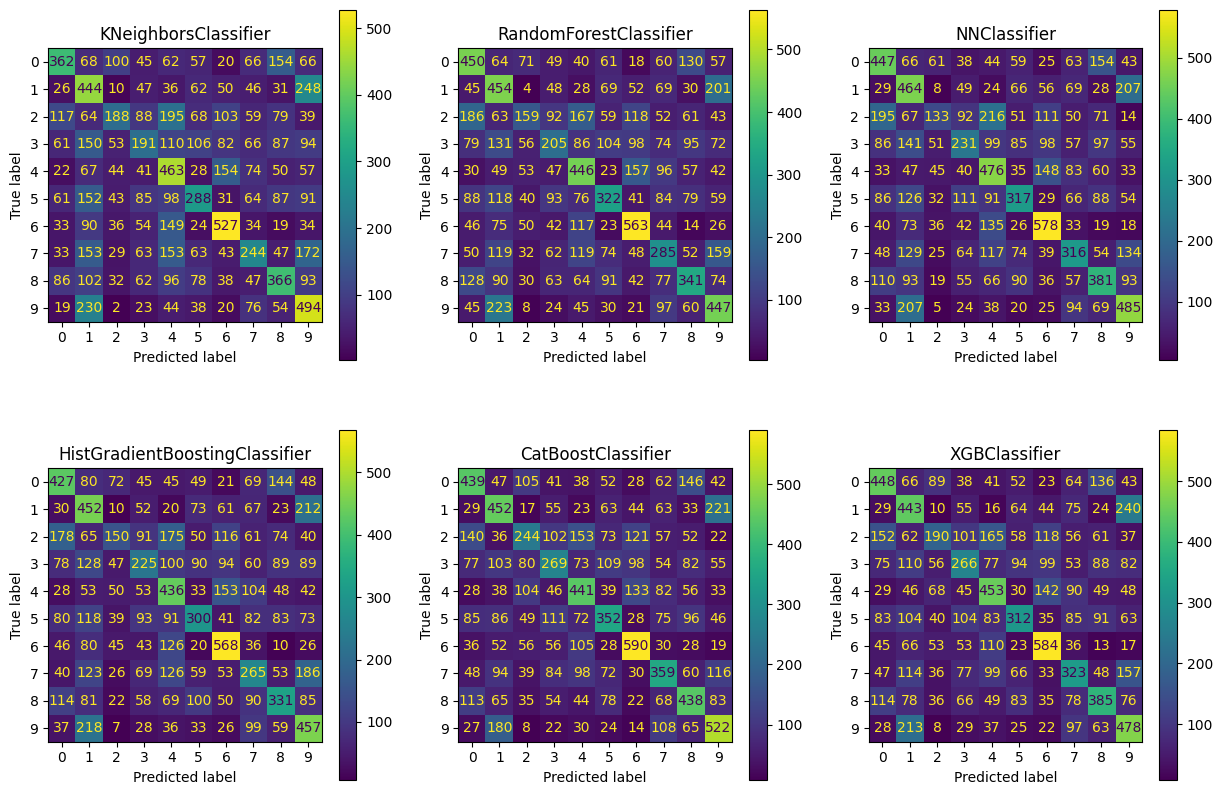

In [16]:
import cvtda.classification

cvtda.classification.classify(train_features, train_labels, test_features, test_labels)